# Using Lloyds Algorithm to Optimize Fire Station Placement

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Initialize fire station locations

In [3]:
stations = pd.read_csv("station_coords.csv")
# fire_events = pd.read_csv("fire_coords.csv")
# fire_events_q2 = pd.read_csv("fire_coords_q2.csv")
# fire_events_q3 = pd.read_csv("fire_coords_q3.csv")
# fire_events_q4 = pd.read_csv("fire_coords_q4.csv")
# lat = list(fire_events["lat"]) + list(fire_events_q2["lat"]) + list(fire_events_q3["lat"]) + list(fire_events_q4["lat"])
# lng = list(fire_events["lng"]) + list(fire_events_q2["lng"]) + list(fire_events_q3["lng"]) + list(fire_events_q4["lng"])
# fire = pd.DataFrame({"lat": lat, "lng": lng})
fire = pd.read_csv("fire_surface.csv")
fire.head()

,Unnamed: 0,lat,lng,value
0,0,33.788041,-84.524059,0.0
1,1,33.788041,-84.519059,253.0
2,2,33.788041,-84.514059,227.0
3,3,33.763041,-84.529059,86.0
4,4,33.763041,-84.524059,1.0


In [4]:
# fire = fire[fire["lat"] < 34]
# fire = fire[fire["lng"] > -85]
# fire.head()
# fire.to_csv("cutoff.csv")
stations.head()

,Unnamed: 0,lat,lng
0,0,33.757698,-84.541429
1,1,33.730047,-84.523155
2,2,33.716363,-84.583163
3,3,33.645515,-84.590455
4,4,33.615071,-84.525732


<function matplotlib.pyplot.show(*args, **kw)>

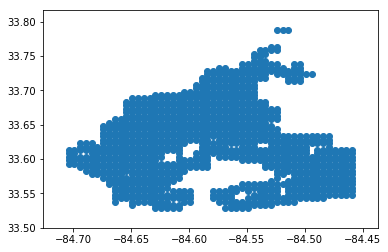

In [5]:
plt.scatter(fire["lng"], fire["lat"])
#plt.scatter(fire_events["lng"], fire_events["lat"], color = "red")
plt.show

We calculate the workload by using the workload surface we calculated with the cubic spline

In [6]:
st = {i : 0 for i in range(len(stations))}
st_coords = [(stations["lat"][i], stations["lng"][i]) for i in range(len(stations))]
for j in st.keys():
    for i in range(len(fire)):
        dist_list = [abs(fire["lat"][i] - st_coords[k][0]) + abs(fire["lng"][i] - st_coords[k][1]) for k in range(len(st_coords))]
        a = min(dist_list)
        index = dist_list.index(a)
        if j == index:
            st[j] += fire["value"][i] * a
st

{0: 2.359203749328711,
 1: 25.94759487290092,
 2: 47.70934355345508,
 3: 66.20784220667429,
 4: 40.42397625055285,
 5: 84.26911796497114,
 6: 61.7545666824036,
 7: 41.84701640781538,
 8: 5.996061165680686,
 9: 48.213113714570284}

In [7]:
vals = np.array([i for i in st.values()])
old = np.var(vals)
old_sum = sum(vals)
old

595.976830880473

Assignment Phase: we assign each fire_event to its nearest station using the manhattan distance

In [7]:
def assign(s_lat, s_lng, fire_lat, fire_lng, values):
    stations_dict = {str(i): [] for i in range(len(s_lat))}
    for i in range(len(fire_lat)):
        manhattan_distance = [abs(fire_lat[i] - s_lat[j]) + abs(fire_lng[i] - s_lng[j]) for j in range(len(s_lat))]
        min_value = min(manhattan_distance)
        min_index = manhattan_distance.index(min_value)
        stations_dict[str(min_index)].append([fire_lng[i], fire_lat[i], values[i]])
        #print((fire_lng[min_index], fire_lat[min_index]))
   
    plt.show()
    return stations_dict

Update Centroid

In [8]:
def update(s_dict):
    station_lngs = [sum([i[0] * i[2] for i in s_dict[j]]) / sum([i[2] for i in s_dict[j]]) for j in s_dict.keys()]
    station_lats = [sum([i[1] * i[2] for i in s_dict[j]]) / sum([i[2] for i in s_dict[j]]) for j in s_dict.keys()]
    return([station_lats, station_lngs])

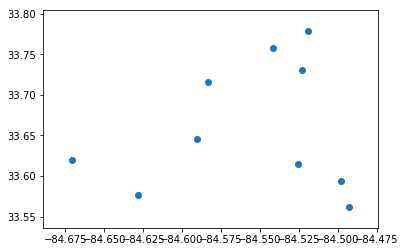

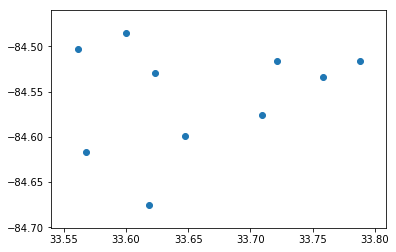

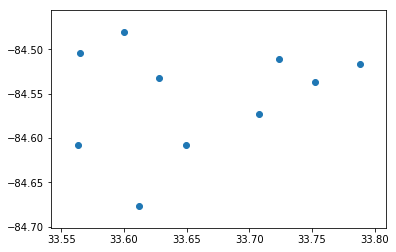

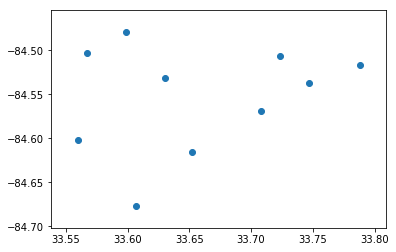

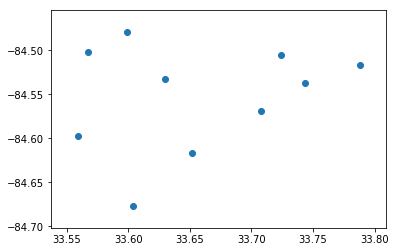

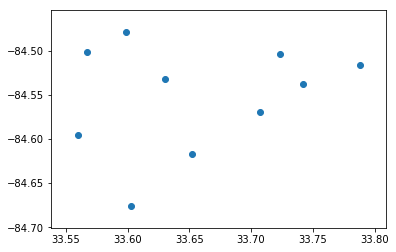

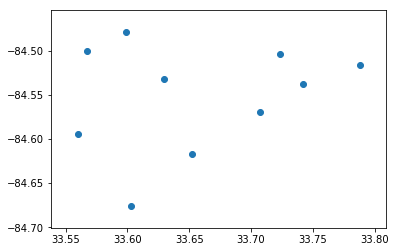

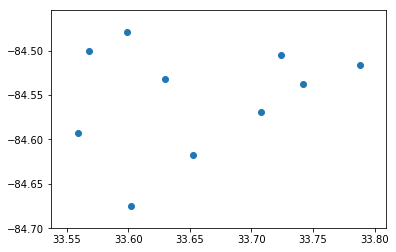

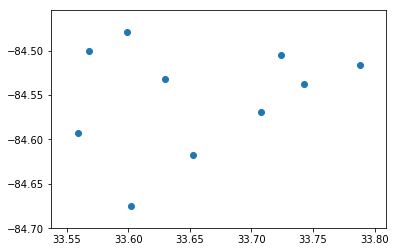

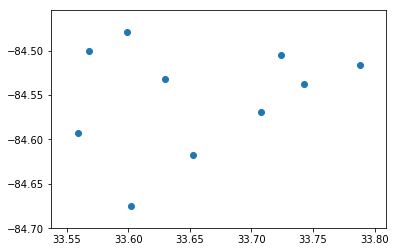

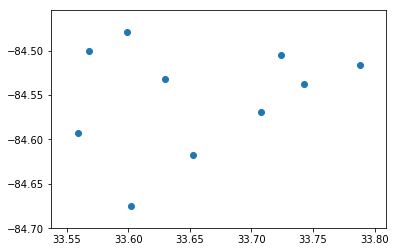

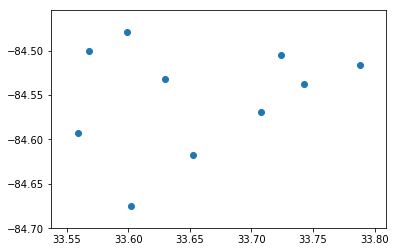

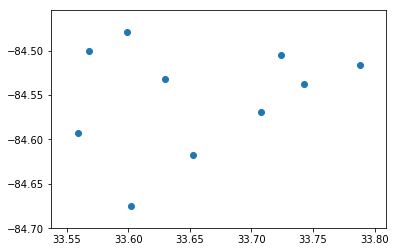

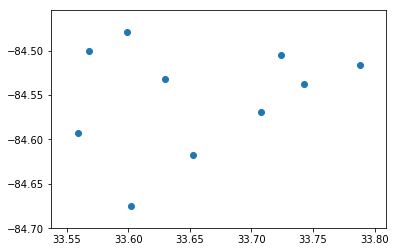

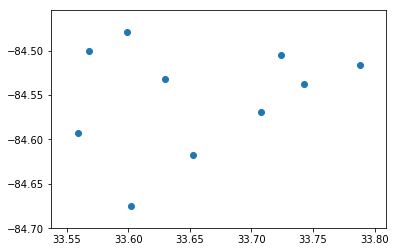

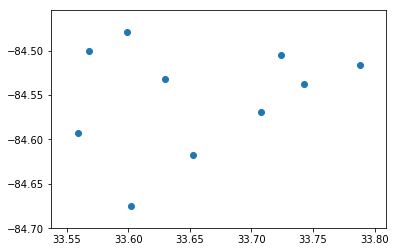

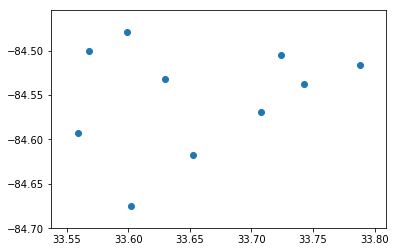

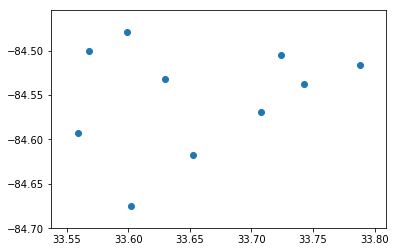

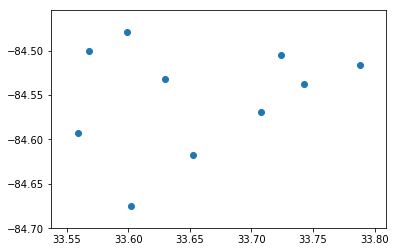

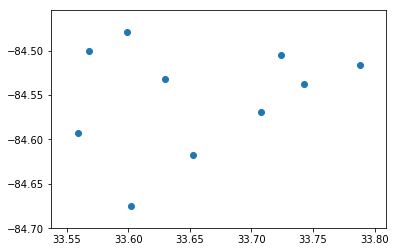

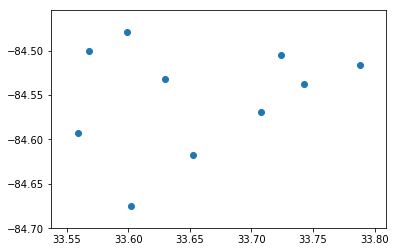

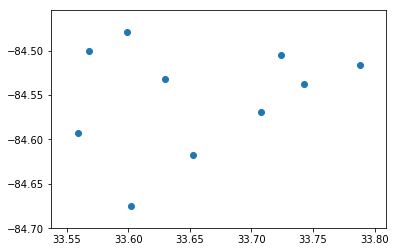

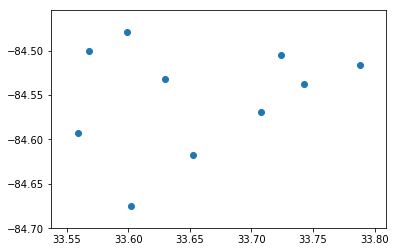

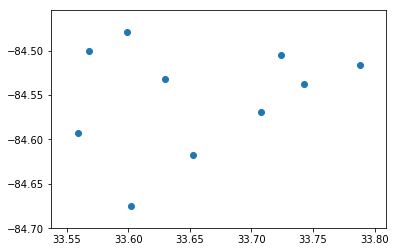

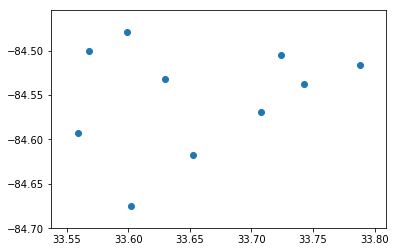

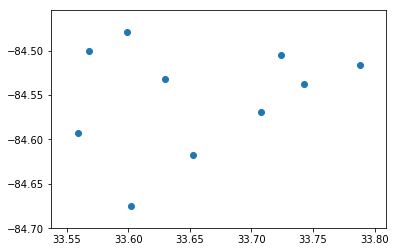

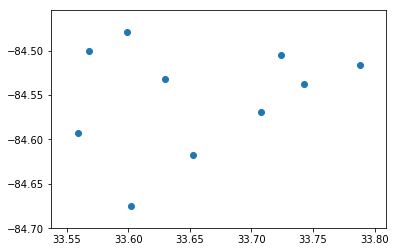

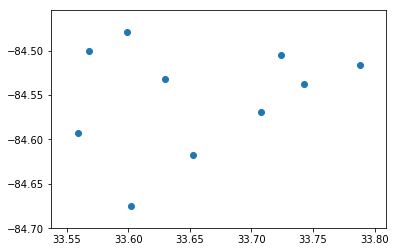

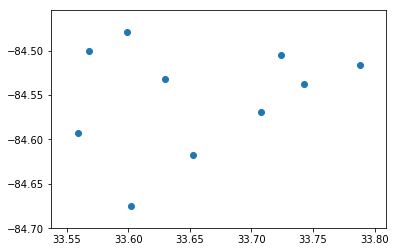

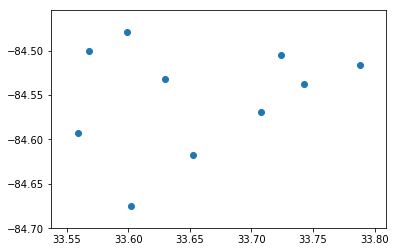

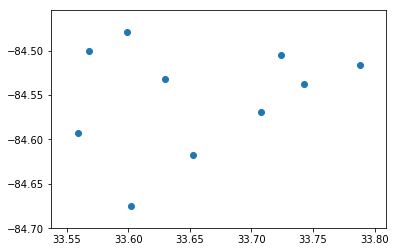

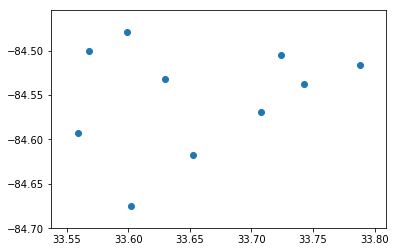

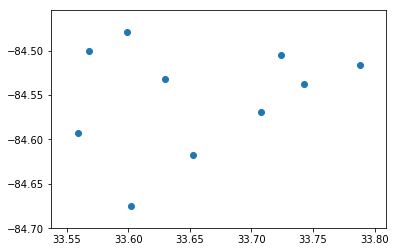

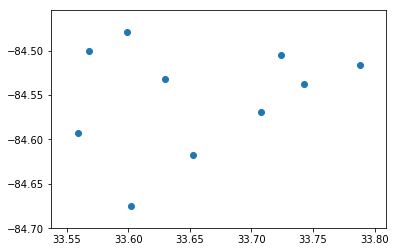

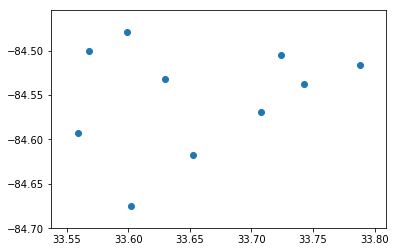

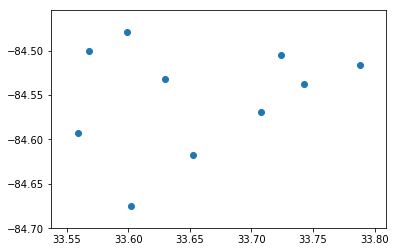

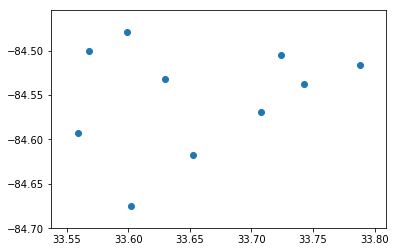

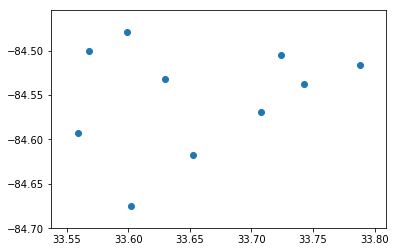

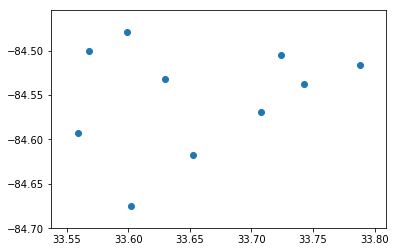

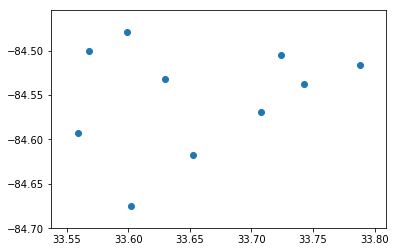

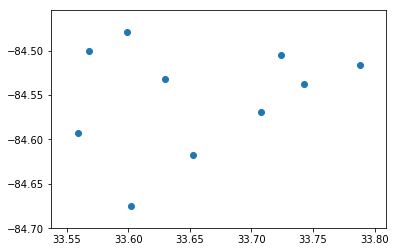

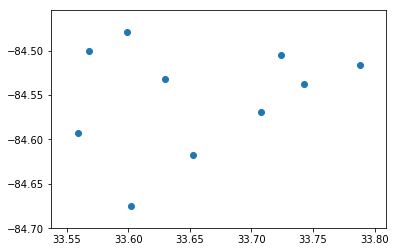

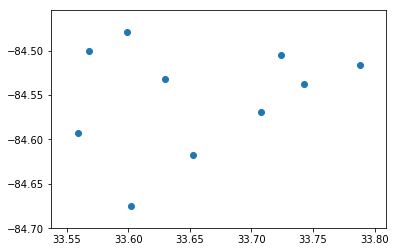

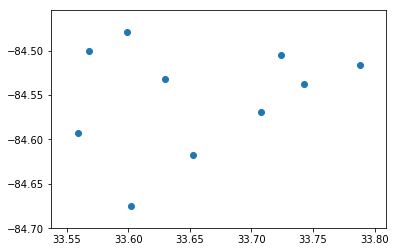

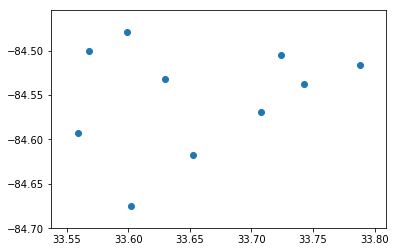

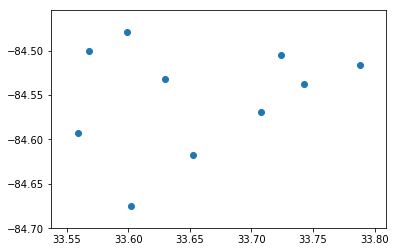

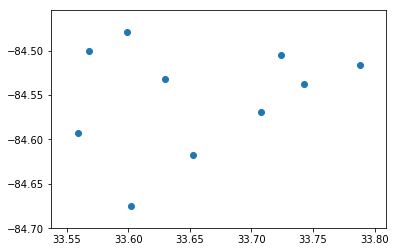

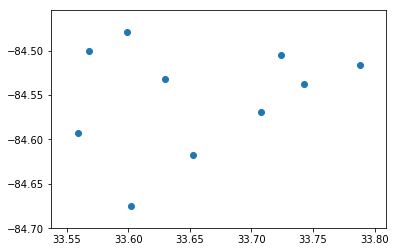

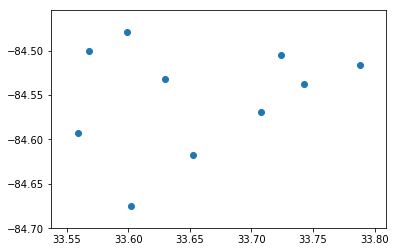

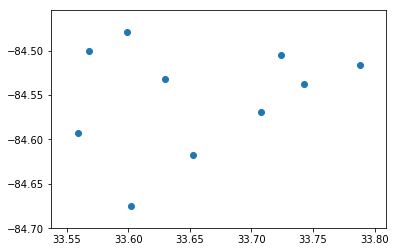

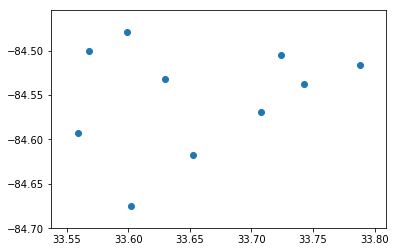

In [9]:
u = [stations["lat"], stations["lng"]]
plt.scatter(stations["lng"], stations["lat"])
plt.show()

for i in range(50):
    a = assign(u[0], u[1], np.array(fire["lat"]), np.array(fire["lng"]), values = fire["value"])
    u = update(a)
    plt.scatter(u[0], u[1])
    plt.show()

In [10]:
new_st = {i : 0 for i in range(len(u[0]))}
new_st_coords = [(u[0][i], u[1][i]) for i in range(len(u[0]))]
for j in new_st.keys():
    for i in range(len(fire)):
        dist_list = [abs(fire["lat"][i] - new_st_coords[k][0]) + abs(fire["lng"][i] - new_st_coords[k][1]) for k in range(len(new_st_coords))]
        a = min(dist_list)
        index = dist_list.index(a)
        if j == index:
            new_st[j] += fire["value"][i] * a
print(st, new_st)

{0: 167.86363636363637, 1: 920.9557414051893, 2: 1428.6695118176192, 3: 1679.080346403322, 4: 1365.5993433327922, 5: 2843.115381676341, 6: 1757.7200054537357, 7: 1054.998878919682, 8: 481.0, 9: 1100.3313633449307} {0: 360.4891887277548, 1: 641.0926754696916, 2: 1447.375131574001, 3: 1682.9647123093816, 4: 1694.7822382747513, 5: 2498.801656186144, 6: 1819.2961838903484, 7: 1097.7222250365685, 8: 481.0, 9: 1075.8101972486065}


In [11]:
vals = np.array([i for i in new_st.values()])
new = np.var(vals)
new_sum = sum(vals)
new / old

0.8299016558861877

In [12]:
updated_loc = pd.DataFrame({"lat": u[0], "lng": u[1]})
updated_loc.to_csv("lloyds_stations.csv")